# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras import layers
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

## Load Data

In [2]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

but Gdown can't. Please check connections and permissions.


In [3]:
df = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')
df

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,...,15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,NaN,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,...,20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,NaN,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,...,20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,...,NaN,0,Yes,Yes,No,05/25/2017 04:30:00 PM,NaN,05/25/2017 04:30:07 PM,Breakdown,School-Age


## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

# **Inspect the dataset and Understand its structure**

In [4]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [5]:
df.tail()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,...,15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,NaN,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,...,20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,NaN,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,...,20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,...,NaN,0,Yes,Yes,No,05/25/2017 04:30:00 PM,NaN,05/25/2017 04:30:07 PM,Breakdown,School-Age
147971,2016-2017,1353046,Project Read PM Run,2530,K617,Other,21436,05/25/2017 04:36:00 PM,05/25/2017 04:37:00 PM,Brooklyn,...,45min,7,Yes,Yes,Yes,05/25/2017 04:37:00 PM,NaN,05/25/2017 04:37:37 PM,Running Late,School-Age


In [6]:
df.sample()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
115772,2016-2017,1337001,Special Ed AM Run,1175,K566,Heavy Traffic,15558,04/03/2017 06:45:00 AM,04/03/2017 06:46:00 AM,Brooklyn,...,45 min,0,Yes,Yes,Yes,04/03/2017 06:46:00 AM,NaN,04/03/2017 06:46:35 AM,Running Late,School-Age


In [7]:
df.shape

(147972, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [9]:
df.dtypes

,0
School_Year,object
Busbreakdown_ID,int64
Run_Type,object
Bus_No,object
Route_Number,object
Reason,object
Schools_Serviced,object
Occurred_On,object
Created_On,object
Boro,object


# **Summary statistics**

In [10]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


# **Check for missing and duplicated values**

In [11]:
df.isna().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [12]:
df.duplicated().sum()

0

# **Distribution of features**

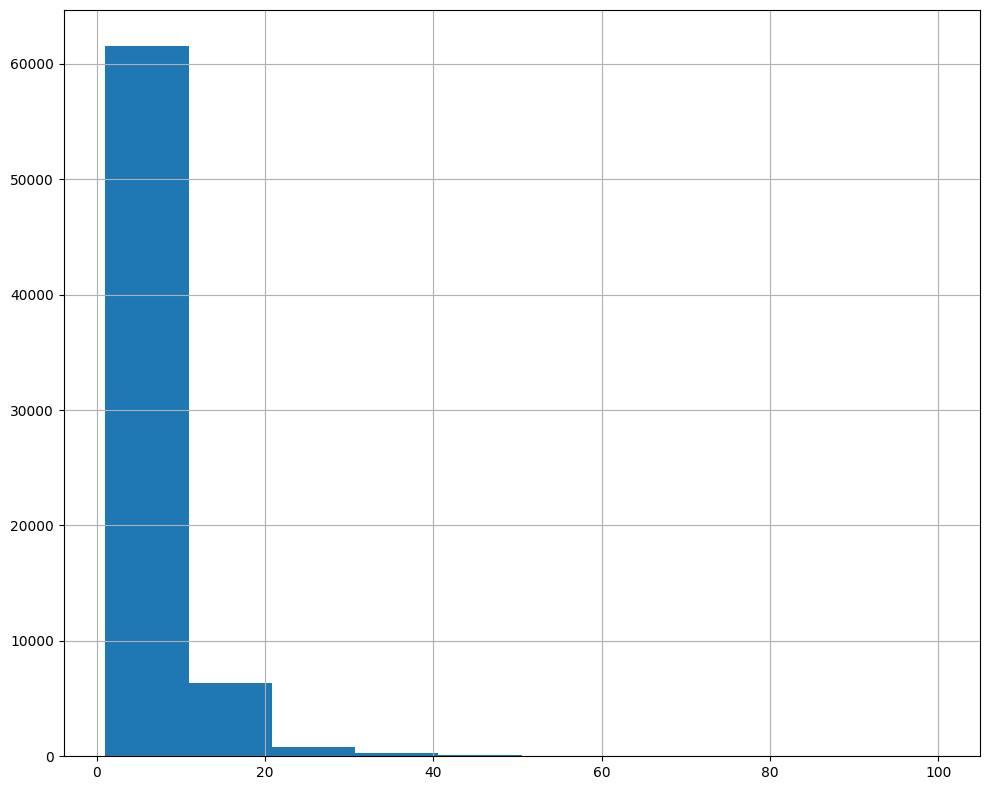

In [13]:
# I just plot the following column because currently it's the only numeric column, ignoring the 'Busbreakdown_ID'
df['Number_Of_Students_On_The_Bus'].hist(bins=10, range=[1,100], figsize=(10, 8))
plt.tight_layout()
plt.show()

# **Categorical feature analysis**

In [14]:
# I ignored all the unnecessary columns
unwanted_columns = df[['Busbreakdown_ID', 'Bus_No', 'Route_Number','Number_Of_Students_On_The_Bus','School_Year', 'Informed_On','Incident_Number','Last_Updated_On','Last_Updated_On', 'Created_On', 'Occurred_On', 'Schools_Serviced', 'Bus_Company_Name']]

for i in df.columns:
  if i not in unwanted_columns:
    print(df[i].value_counts(), '\n')

Run_Type
Special Ed AM Run          85990
Pre-K/EI                   20951
Special Ed PM Run          17672
General Ed AM Run          17182
General Ed PM Run           4541
Special Ed Field Trip        628
General Ed Field Trip        570
Project Read PM Run          300
Project Read AM Run           47
Project Read Field Trip        2
Name: count, dtype: int64 

Reason
Heavy Traffic                  87426
Other                          21666
Mechanical Problem             13908
Won`t Start                     7277
Flat Tire                       4585
Weather Conditions              4527
Late return from Field Trip     3464
Problem Run                     2204
Delayed by School               1446
Accident                        1367
Name: count, dtype: int64 

Boro
Bronx              40995
Brooklyn           35632
Manhattan          28675
Queens             21169
Staten Island       6923
Westchester         4535
Nassau County       1970
New Jersey           887
Rockland County      49

# **Correlation matrix**

In [15]:
# Since it is the only numeric columns, I used it in the correlation matrix
numeric_columns = df[['Number_Of_Students_On_The_Bus']]
correlation = numeric_columns.corr()
print(correlation)

                               Number_Of_Students_On_The_Bus
Number_Of_Students_On_The_Bus                            1.0


# **Outlier detection**

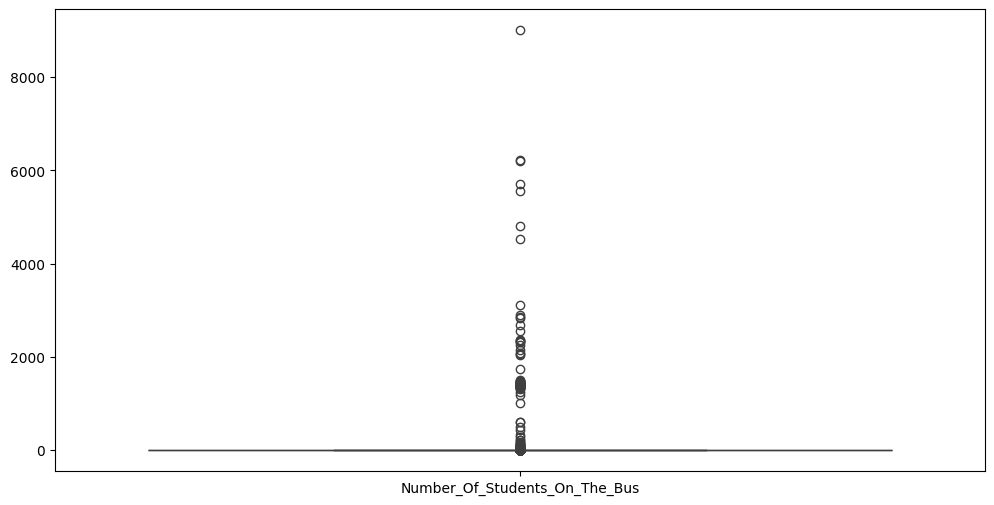

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Number_Of_Students_On_The_Bus']])
plt.show()

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

# **Handle Missing Values**

In [17]:
df.isna().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [18]:
df['Run_Type'] = df['Run_Type'].fillna(df['Run_Type'].mode().iloc[0])
df['Route_Number'] = df['Route_Number'].fillna(df['Route_Number'].mode().iloc[0]) # I found that this column has some categories they are not all numbers so I used the mode
df['Reason'] = df['Reason'].fillna(df['Reason'].mode().iloc[0])
df['Boro'] = df['Boro'].fillna(df['Boro'].mode().iloc[0])

In [19]:
df = df.drop(['Incident_Number'], axis=1)

In [20]:
df.isna().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0


## **Cleaning 'How_Long_Delayed' Column**

In [21]:
# I tried to clean it by deleting all the units in the samples but it leads me to reduce the data till 983 and this will affect the model performance so I decided to delete it
# Steps are shown in the following cells
df['How_Long_Delayed'].value_counts()

,count
How_Long_Delayed,
20 MINS,5662
30 MINS,4542
30 minutes,3650
15 mins,3522
30MINS,3199
...,...
45 MON,1
18 mins,1
146,1


In [22]:
df['How_Long_Delayed'] = df['How_Long_Delayed'].str.replace('MINS', '', regex=False)
df['How_Long_Delayed'] = df['How_Long_Delayed'].str.replace('minutes', '', regex=False)
df['How_Long_Delayed'] = df['How_Long_Delayed'].str.replace('mins', '', regex=False)
df['How_Long_Delayed'] = df['How_Long_Delayed'].str.replace('MON', '', regex=False)
df['How_Long_Delayed'] = df['How_Long_Delayed'].str.replace('MINIUTE', '', regex=False)
df['How_Long_Delayed'] = df['How_Long_Delayed'].str.replace('1HOUR15MIN', '75', regex=False)
df['How_Long_Delayed'] = df['How_Long_Delayed'].str.replace('Mins.', '', regex=False)
df['How_Long_Delayed'] = df['How_Long_Delayed'].str.replace('Mins', '', regex=False)
df['How_Long_Delayed'] = df['How_Long_Delayed'].str.replace('MIN', '', regex=False)
df['How_Long_Delayed'] = df['How_Long_Delayed'].str.replace('1Hr', '60', regex=False)
df['How_Long_Delayed'] = df['How_Long_Delayed'].str.replace('MINUTRS', '', regex=False)
df['How_Long_Delayed'] = df['How_Long_Delayed'].str.replace('min', '', regex=False)
df['How_Long_Delayed'] = df['How_Long_Delayed'].str.replace('13-15', '14.5', regex=False)
df['How_Long_Delayed'] = df['How_Long_Delayed'].str.replace('30-60', '45', regex=False)
df['How_Long_Delayed'] = df['How_Long_Delayed'].str.replace('40 -50', '45', regex=False)
df['How_Long_Delayed'] = df['How_Long_Delayed'].str.replace('MNS', '45', regex=False)
df['How_Long_Delayed'] = df['How_Long_Delayed'].str.replace('MIS', '45', regex=False)

df['How_Long_Delayed'] = df['How_Long_Delayed'].str.replace('IHR40', '', regex=False)
df['How_Long_Delayed'] = df['How_Long_Delayed'].str.replace('35-40 MN', '', regex=False)
df['How_Long_Delayed'] = df['How_Long_Delayed'].str.replace('4/5 mns', '', regex=False)

df['How_Long_Delayed'] = df['How_Long_Delayed'].str.replace('ONE HOUR', '', regex=False)
df['How_Long_Delayed'] = df['How_Long_Delayed'].str.replace('45 b', '', regex=False)
df['How_Long_Delayed'] = df['How_Long_Delayed'].str.replace('11 ie', '', regex=False)
df['How_Long_Delayed'] = df['How_Long_Delayed'].str.replace('HA 9944', '', regex=False)
df['How_Long_Delayed'] = df['How_Long_Delayed'].str.replace('5UTOS', '', regex=False)

In [23]:
units = set(word.lower()
    for phrase in df['How_Long_Delayed'].dropna()
    for word in str(phrase).split()
    if word.isalpha())

for i in units:
    df['How_Long_Delayed'] = df['How_Long_Delayed'].str.replace(i, '', regex=False)

In [24]:
df['How_Long_Delayed'].value_counts()

,count
How_Long_Delayed,
30,15747
20,15233
15,10177
30,7558
20,6908
...,...
1657,1
10:,1
2228,1


In [25]:
df = df.drop(['How_Long_Delayed'], axis=1)
df.isna().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0


# **Encode Categorical Variables**

In [26]:
# I ignored all the unnecessary columns
unwanted_columns = df[['Busbreakdown_ID', 'Bus_No', 'Route_Number','Number_Of_Students_On_The_Bus','School_Year', 'Informed_On', 'Last_Updated_On','Last_Updated_On', 'Created_On', 'Occurred_On', 'Schools_Serviced', 'Bus_Company_Name']]

for i in df.columns:
  if i not in unwanted_columns:
    print(df[i].value_counts(), '\n')

Run_Type
Special Ed AM Run          86079
Pre-K/EI                   20951
Special Ed PM Run          17672
General Ed AM Run          17182
General Ed PM Run           4541
Special Ed Field Trip        628
General Ed Field Trip        570
Project Read PM Run          300
Project Read AM Run           47
Project Read Field Trip        2
Name: count, dtype: int64 

Reason
Heavy Traffic                  87528
Other                          21666
Mechanical Problem             13908
Won`t Start                     7277
Flat Tire                       4585
Weather Conditions              4527
Late return from Field Trip     3464
Problem Run                     2204
Delayed by School               1446
Accident                        1367
Name: count, dtype: int64 

Boro
Bronx              47313
Brooklyn           35632
Manhattan          28675
Queens             21169
Staten Island       6923
Westchester         4535
Nassau County       1970
New Jersey           887
Rockland County      49

In [27]:
# One hot encoding
df = pd.get_dummies(df, columns = ['School_Age_or_PreK','Have_You_Alerted_OPT','Has_Contractor_Notified_Parents','Has_Contractor_Notified_Schools','Breakdown_or_Running_Late'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   School_Year                             147972 non-null  object
 1   Busbreakdown_ID                         147972 non-null  int64 
 2   Run_Type                                147972 non-null  object
 3   Bus_No                                  147972 non-null  object
 4   Route_Number                            147972 non-null  object
 5   Reason                                  147972 non-null  object
 6   Schools_Serviced                        147972 non-null  object
 7   Occurred_On                             147972 non-null  object
 8   Created_On                              147972 non-null  object
 9   Boro                                    147972 non-null  object
 10  Bus_Company_Name                        147972 non-null 

In [29]:
#Label encoding
label = LabelEncoder()
label_columns = df[['Run_Type','Reason','Boro']]

for i in label_columns.columns:
  df[i] = label.fit_transform(df[i])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   School_Year                             147972 non-null  object
 1   Busbreakdown_ID                         147972 non-null  int64 
 2   Run_Type                                147972 non-null  int64 
 3   Bus_No                                  147972 non-null  object
 4   Route_Number                            147972 non-null  object
 5   Reason                                  147972 non-null  int64 
 6   Schools_Serviced                        147972 non-null  object
 7   Occurred_On                             147972 non-null  object
 8   Created_On                              147972 non-null  object
 9   Boro                                    147972 non-null  int64 
 10  Bus_Company_Name                        147972 non-null 

In [31]:
df['Occurred_On'] = pd.to_datetime(df['Occurred_On'])
df['Created_On'] = pd.to_datetime(df['Created_On'])

df['Informed_On'] = pd.to_datetime(df['Informed_On'])
df['Last_Updated_On'] = pd.to_datetime(df['Last_Updated_On'])

In [32]:
# Here I removed all the columns that currently I dont think its related to the objective of building the model so I dropped them
df = df.drop(['School_Year','Bus_No','Route_Number','Schools_Serviced','Bus_Company_Name', 'Busbreakdown_ID'], axis=1)

# **Normalization**

In [33]:
scaler = MinMaxScaler()
df[['Number_Of_Students_On_The_Bus']] = scaler.fit_transform(df[['Number_Of_Students_On_The_Bus']])

# **Feature Engineering**

In [34]:
df['Year'] = df['Occurred_On'].dt.year
df['Month'] = df['Occurred_On'].dt.month
df['Day'] = df['Occurred_On'].dt.day

In [35]:
# I created a new function to define whether the incidents happened in a peak time or not

def is_peak_time(row):
  morning = range(7, 11)
  night = range(16, 22)
  time_hour = row['Occurred_On'].hour
  return time_hour in morning or time_hour in night

df['IS_Peak_Time'] = df.apply(is_peak_time, axis=1)

In [36]:
# I dropped them now so that they do not cause an error in the training process
df = df.drop(['Occurred_On','Created_On','Informed_On','Last_Updated_On'], axis=1)

# **Checking of all applied steps**

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 18 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Run_Type                                147972 non-null  int64  
 1   Reason                                  147972 non-null  int64  
 2   Boro                                    147972 non-null  int64  
 3   Number_Of_Students_On_The_Bus           147972 non-null  float64
 4   School_Age_or_PreK_Pre-K                147972 non-null  bool   
 5   School_Age_or_PreK_School-Age           147972 non-null  bool   
 6   Have_You_Alerted_OPT_No                 147972 non-null  bool   
 7   Have_You_Alerted_OPT_Yes                147972 non-null  bool   
 8   Has_Contractor_Notified_Parents_No      147972 non-null  bool   
 9   Has_Contractor_Notified_Parents_Yes     147972 non-null  bool   
 10  Has_Contractor_Notified_Schools_No      1479

In [38]:
df.dtypes

,0
Run_Type,int64
Reason,int64
Boro,int64
Number_Of_Students_On_The_Bus,float64
School_Age_or_PreK_Pre-K,bool
School_Age_or_PreK_School-Age,bool
Have_You_Alerted_OPT_No,bool
Have_You_Alerted_OPT_Yes,bool
Has_Contractor_Notified_Parents_No,bool
Has_Contractor_Notified_Parents_Yes,bool


In [39]:
df.sample()

,Run_Type,Reason,Boro,Number_Of_Students_On_The_Bus,School_Age_or_PreK_Pre-K,School_Age_or_PreK_School-Age,Have_You_Alerted_OPT_No,Have_You_Alerted_OPT_Yes,Has_Contractor_Notified_Parents_No,Has_Contractor_Notified_Parents_Yes,Has_Contractor_Notified_Schools_No,Has_Contractor_Notified_Schools_Yes,Breakdown_or_Running_Late_Breakdown,Breakdown_or_Running_Late_Running Late,Year,Month,Day,IS_Peak_Time
53926,8,9,7,0.0,False,True,True,False,False,True,False,True,True,False,2016,6,8,True


# **Handle Outliers**

In [40]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, 'Number_Of_Students_On_The_Bus')

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [41]:
x = df.drop(['Breakdown_or_Running_Late_Running Late', 'Breakdown_or_Running_Late_Breakdown'], axis=1)
y = df['Breakdown_or_Running_Late_Breakdown']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=42)

# Oversampling

In [42]:
# it's a preprocess step but it's better to be performed after splitting the data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [43]:
model = Sequential([
    layers.Dense(16, activation='relu',kernel_initializer='uniform',input_dim=x.shape[1]),
    layers.Dense(32, activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [44]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,993 (11.69 KB)

 Trainable params: 2,993 (11.69 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the ANN model using the training data.

In [46]:
# I tried 100 epocha but it leads to overfitting
history = model.fit(X_train_resampled, y_train_resampled, batch_size=64,epochs=85, validation_split=0.15)

Epoch 1/85
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6308 - loss: 0.8305 - val_accuracy: 0.5567 - val_loss: 0.7374
Epoch 2/85
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7184 - loss: 0.5554 - val_accuracy: 0.9352 - val_loss: 0.4879
Epoch 3/85
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8421 - loss: 0.3704 - val_accuracy: 0.9012 - val_loss: 0.2832
Epoch 4/85
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8834 - loss: 0.3020 - val_accuracy: 0.9063 - val_loss: 0.3328
Epoch 5/85
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8912 - loss: 0.2898 - val_accuracy: 0.9086 - val_loss: 0.2671
Epoch 6/85
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8917 - loss: 0.2857 - val_accuracy: 0.9095 - val_loss: 0.3155
Epoch 7/85
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8978 - loss: 0.2763 - val_accuracy: 0.8899 - val_loss: 0.3304
Epoch 8/85
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8973 - loss: 0.2776 

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [47]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: % {:.2f}'.format(score[0] * 100))
print('Test accuracy: % {:.2f}'.format(score[1] *100))

Test loss: % 25.55
Test accuracy: % 90.00


## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [48]:
predictions = model.predict(x_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


In [49]:
predictions = [1 if p > 0.5 else 0 for p in predictions]

for i in range(10):
    print(f"Actual: {y_test.iloc[i]}, Predicted: {predictions[i]}")

Actual: False, Predicted: 0
Actual: False, Predicted: 0
Actual: False, Predicted: 0
Actual: False, Predicted: 0
Actual: True, Predicted: 1
Actual: True, Predicted: 0
Actual: False, Predicted: 0
Actual: False, Predicted: 1
Actual: False, Predicted: 0
Actual: False, Predicted: 0


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

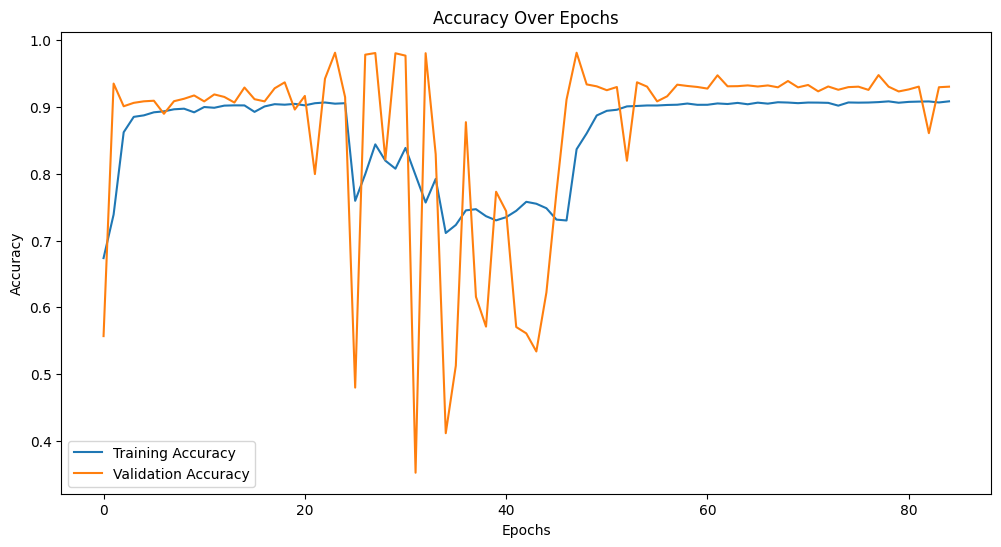

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

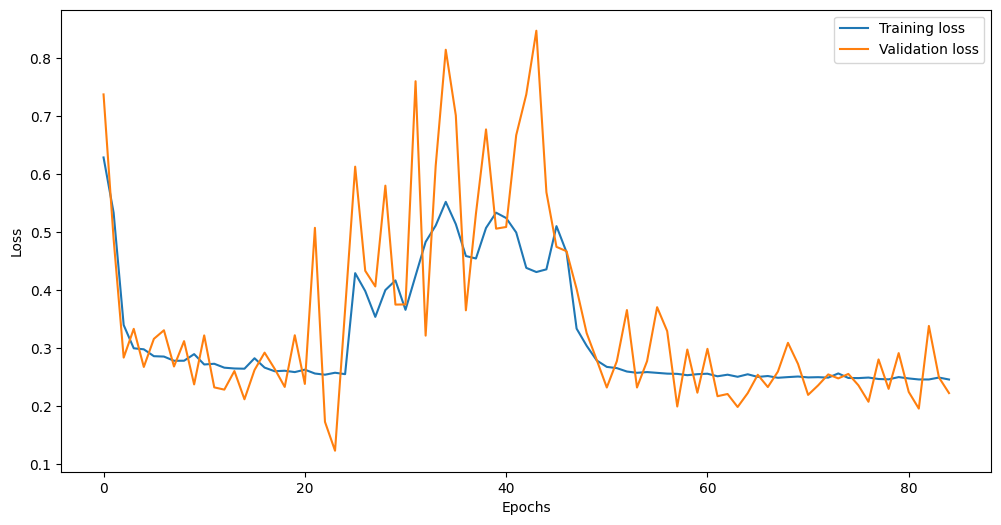

In [51]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

## Save the Model
Save the trained model for submission.

In [52]:
model.save('/content/model.keras')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

1- I chosed it becuase thats what the current data set required ( this steps is needed for this data)

2 & 3- It gives the highest result

4- becuase its binary classification

5- I did not used

6- F1-score its better for classification but I don't have time

7- number of epochs, batch size, and number of neurons

8- model is almot generalized